目录

准备数据

Pandas直接保存数据

Pandas的Styler对表格着色输出

Pandas使用xlsxwriter引擎保存数据

xlsxwriter按照指定样式写出Pandas对象的数据

Pandas自适应列宽保存数据

相关资料

总结

准备数据

In [1]:
import pandas as pd
from datetime import datetime, date

df = pd.DataFrame({'Date and time': [datetime(2015, 1, 1, 11, 30, 55),
                                     datetime(2015, 1, 2, 1, 20, 33),
                                     datetime(2015, 1, 3, 11, 10),
                                     datetime(2015, 1, 4, 16, 45, 35),
                                     datetime(2015, 1, 5, 12, 10, 15)],
                   'Dates only': [date(2015, 2, 1),
                                  date(2015, 2, 2),
                                  date(2015, 2, 3),
                                  date(2015, 2, 4),
                                  date(2015, 2, 5)],
                   'Numbers': [1010, 2020, 3030, 2020, 1515],
                   'Percentage': [.1, .2, .33, .25, .5],
                   })
df['final'] = [f'=C{i}*D{i}' for i in range(2, df.shape[0]+2)]
df

,Date and time,Dates only,Numbers,Percentage,final
0,2015-01-01 11:30:55,2015-02-01,1010,0.10,=C2*D2
1,2015-01-02 01:20:33,2015-02-02,2020,0.20,=C3*D3
2,2015-01-03 11:10:00,2015-02-03,3030,0.33,=C4*D4
3,2015-01-04 16:45:35,2015-02-04,2020,0.25,=C5*D5
4,2015-01-05 12:10:15,2015-02-05,1515,0.50,=C6*D6


In [2]:
# Pandas直接保存数据
# 对于这个pandas对象，如果我们需要将其保存为excel，有那些操作方式呢？首先，最简单的，直接保存：

df.to_excel('demo1.xlsx', sheet_name='Sheet1', index=False)

In [ ]:
# 但如果我们想要给这个excel在保存时，同时指定一些特殊的自定义格式又该怎么做呢？这时就可以使用ExcelWriter进行操作，查看API文档发现两个重要参数：

date_format : str, default None

Format string for dates written into Excel files (e.g. 'YYYY-MM-DD').

datetime_format : str, default None

Format string for datetime objects written into Excel files. (e.g. 'YYYY-MM-DD HH:MM:SS').

# 这说明对于日期类型数据，都可以通过这两个参数指定特定的显示格式，那么我们采用以下方式才创建ExcelWriter，并保存结果：

writer = pd.ExcelWriter('demo1.xlsx',
                        datetime_format='mmm d yyyy hh:mm:ss',
                        date_format='mmmm dd yyyy')
df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
# 可以看到excel保存的结果中，格式已经确实的发生了改变：

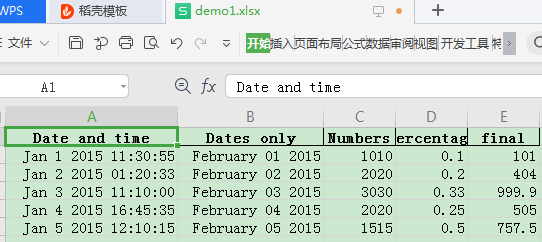

In [ ]:
# Pandas的Styler对表格着色输出
# 如果我们想对指定的列的数据设置文字颜色或背景色，可以直接pandas.io.formats.style工具，该工具可以直接对指定列用指定的规则着色：

df_style = df.style.applymap(lambda x: 'color:red', subset=['Date and time']) \
    .applymap(lambda x: 'color:green', subset=['Dates only']) \
    .applymap(lambda x: 'background-color:#ADD8E6', subset=['Numbers']) \
    .background_gradient(cmap='PuBu', low=0, high=0.5, subset=['Percentage'])
df_style

# 显示效果：



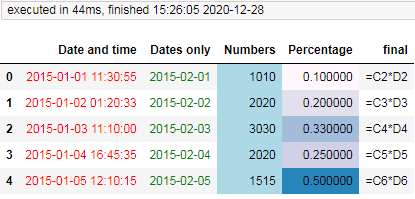

In [ ]:
writer = pd.ExcelWriter('demo_style.xlsx',
                        datetime_format='mmm d yyyy hh:mm:ss',
                        date_format='mmmm dd yyyy')
df_style.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
# 保存效果：

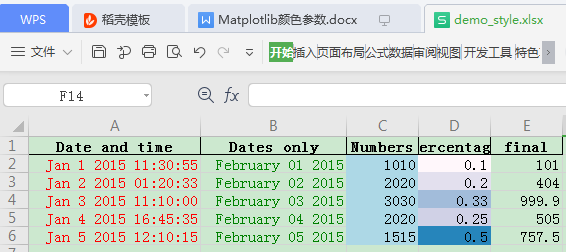

### pandas 批量读取excel_pandas 循环读取文件夹下的 excel，并汇总到一张表格 (函数版)

In [ ]:
-- coding:utf-8 –-

"""

利用 pandas 将多张 excel 表中的指定列数据合并成一张；因为原始的多张数据存在同样列名的数据，

因为原始多张 excel 是从 csv 文件转换股

并且我们只需要其中的部分列数据，所以进行指定列提取并汇总至 res 文件中

"""

import os

import pandas as pd

#输入参数为 excel 表格所在目录

def to_one_excel(dir):

    dfs = []

# 遍历文件目录，将所有表格表示为 pandas 中的 DataFrame 对象

# for root_dir, sub_dir, files in os.walk(r'' + dir): # 第一个为起始路径，第二个为起始路径下的文件夹，第三个是起始路径下的文件。

    for root_dir, sub_dir, files in os.walk(dir): # 第一个为起始路径，第二个为起始路径下的文件夹，第三个是起始路径下的文件。

        for file in files:

            if file.endswith(‘xlsx’):

                # 构造绝对路径

                file_name = os.path.join(root_dir, file)

                # df = pd.read_excel(file_name)

                df_1 = list(pd.read_excel(file_name, nrows=1)) # 读取 excel 第一行数据并放进列表

    # excel 第一行数据返回列表

    print(file_name)

    print(type(df_1))

    print(df_1)

    # 根据第一行列名获取每个文件中需要列的列索引，返回索引数值

    suo_yin_1 = df_1.index(“Billing Country”)

    suo_yin_2 = df_1.index(“Created at”)

    suo_yin_3 = df_1.index(“Updated at”)

    suo_yin_4 = df_1.index(“Paid Price”)

    suo_yin_5 = df_1.index(“Shipment Type Name”)

    suo_yin_6 = df_1.index(“Status”)

    # 读取文件内容 usecols=[1, 3, 4] 读取第 1,3,4 列

    df = pd.read_excel(file_name, usecols=[suo_yin_1, suo_yin_2, suo_yin_3, suo_yin_4, suo_yin_5, suo_yin_6]

    , sheet_name=‘data’)

    # pf = pd.read_excel('xxx.xls', usecols=[1, 3, 4], sheet_name='data')

    # print(pf)

    # 追加一列数据，将每个文件的名字追加进该文件的数据中，确定每条数据属于哪个文件

    excel_name = file.replace(".xlsx", "") # 提取每个excel文件的名称，去掉.xlsx后缀

    df["店铺"] = excel_name # 新建列名为“店铺”，列数据为excel文件名

    dfs.append(df) # 将新建店铺列追加进汇总excel中

    # 行合并

    df_concated = pd.concat(dfs)

    # 构造输出目录的绝对路径

    out_path = os.path.join(dir, 'res.xlsx')

    # 输出到excel表格中，并删除pandas默认的index列

    df_concated.to_excel(out_path, sheet_name='Sheet1', index=None)

#调用并执行函数

to_one_excel(r'C:甥敳獲AdministratorDesktopceshixlsx 文件’)

3.根据条件查询找到指定行数据

例如查找A部门所有成员的的姓名和工资或者工资低于3000的人：

代码如下：

In [13]:
import pandas as pd 

os.chdir(r"D:\test")
excel_file = './try.xlsx'               #导入excel数据
data = pd.read_excel(excel_file)        
print(data.loc[data['部门']=='A',['部门','姓名','工资']])
print(data.loc[data['工资'] < 3000, ['姓名','工资']])

<IPython.core.display.Javascript object>

   部门  姓名    工资
0   A  张三  3000
2   A  王五  6456
7   A  阿Y  5643
8   A  李书  5464
9   A  洪达  6575
10  A  周休  9324
11  A  陆迪  5436
12  A  章风  8796
16  A  神经  8546
    姓名    工资
4   秀儿  2345
13  阿萨  2348


In [33]:
def to_one_excel(dir):
    
    os.chdir(r"D:\test1")
    file_list = []
    for root_dir, sub_dir, files in os.walk(dir): # 第一个为起始路径，第二个为起始路径下的文件夹，第三个是起始路径下的文件。
        for file in files:
            if file.endswith('.xlsx'):
                # 构造绝对路径
                file_name = os.path.join(root_dir, file)
                file_list.append(file_name)
    dfs=[]
    dfs2=[]
    for file1 in file_list:
        data = pd.read_excel(file1)
        dataframe_1 =  data.loc[data['部门'] == 'A', ['姓名', '工资']]
        dataframe_1['文件']=file1
        dataframe_2 =  data.loc[data['工资'] < 3000, ['姓名', '工资']]
        dataframe_2['文件']=file1
        
        dfs.append(dataframe_1)
        dfs2.append(dataframe_2)
        
        allexcel=pd.concat( dfs)
        allexcel2=pd.concat(dfs2)
        

    allexcel.to_excel('./finall部门.xlsx',index=False)
    allexcel2.to_excel('./finallname.xlsx',index=False)
        

to_one_excel(r"D:\test1")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
"""导出为excel或csv文件"""
dataframe_1 = data.loc[data['部门'] == 'A', ['姓名', '工资']]
dataframe_2 = data.loc[data['工资'] < 3000, ['姓名', '工资']]
dataframe_1.to_excel('dataframe_1.xlsx')
dataframe_2.to_excel('dataframe_2.xlsx')


4.找出指定列

In [ ]:
data['columns']  #columns即你需要的字段名称即可
#注意这列的columns不能是index的名称
#如果要打印index的话就data.index
data.columns  #与上面的一样


In [ ]:
# 5.找出指定的行和指定的列
# 主要使用的就是函数iloc

data.iloc[:,:2]  #即全部行，前两列的数据  逗号前是行，逗号后是列的范围，很容易理解

In [ ]:
# 6.在规定范围内找出符合条件的数据

data.iloc[:10,:][data.工资>6000]

# 这样即可找出前11行里工资大于6000的所有人的信息了

In [47]:
os.chdir(r"D:\test1")
dir_str=r'D:\test1'
file_name_list=os.listdir(dir_str)
file_dir_list=[os.path.join(dir_str,x) for x in file_name_list]
df=pd.DataFrame()
for i in file_name_list:
    if (i[-4:]=='xlsx'):
        EXCEL1=pd.read_excel(i,sheet_name='Sheet1')
        df=pd.concat([df,EXCEL1],ignore_index=True)
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,部门,姓名,工资
0,1,张三,3000
1,2,李四,6600
2,3,王五,6456
3,4,黑六,6542
4,5,秀儿,2345
5,6,阿花,6546
6,7,阿华,7896
7,8,阿Y,5643
8,9,李书,5464
9,10,洪达,6575
